In [10]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt

In [11]:
# load mask labelled points
labelled_points = np.load("mask.npz")["arm_keypoints"]

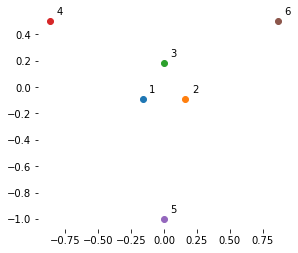

In [13]:
def euclidean_distance(point1, point2):
    """
    Calculate the euclidean distance between two points
    """
    return np.linalg.norm(point1 - point2)

arm_length = 1.0
arm_width = arm_length * np.mean([np.mean([
    euclidean_distance(labelled_points[i][0],labelled_points[i][1]),
    euclidean_distance(labelled_points[i][1],labelled_points[i][2]),
    euclidean_distance(labelled_points[i][2],labelled_points[i][0])
]) / np.mean([
    euclidean_distance(labelled_points[i][3],(labelled_points[i][0]+labelled_points[i][1]+labelled_points[i][2])/3),
    euclidean_distance(labelled_points[i][4],(labelled_points[i][0]+labelled_points[i][1]+labelled_points[i][2])/3),
    euclidean_distance(labelled_points[i][5],(labelled_points[i][0]+labelled_points[i][1]+labelled_points[i][2])/3)
]) for i in range(len(labelled_points))])

reward_distance = 0.8
origin = np.array([0.0, 0.0])

# get three corners of a triangle
k1 = origin + arm_width/np.sqrt(3) * np.array([np.cos(np.pi/2+2*np.pi/3), np.sin(np.pi/2+2*np.pi/3)])
k2 = origin + arm_width/np.sqrt(3) * np.array([np.cos(np.pi/2+4*np.pi/3), np.sin(np.pi/2+4*np.pi/3)])
k3 = origin + arm_width/np.sqrt(3) * np.array([np.cos(np.pi/2), np.sin(np.pi/2)])

# get the endpoints of the arm
k4 = origin + arm_length * np.array([np.cos(np.pi/6+2*np.pi/3), np.sin(np.pi/6+2*np.pi/3)])
k5 = origin + arm_length * np.array([np.cos(np.pi/6+4*np.pi/3), np.sin(np.pi/6+4*np.pi/3)])
k6 = origin + arm_length * np.array([np.cos(np.pi/6), np.sin(np.pi/6)])

# plot the triangles
for i,k in enumerate([k1, k2, k3, k4, k5, k6]):
    plt.plot(k[0], k[1], 'o')
    plt.text(k[0] + 0.05, k[1] + 0.05, str(i+1))

plt.gca().set_aspect('equal')
plt.box()
plt.show()

reference_points = np.array([k1, k2, k3, k4, k5, k6])

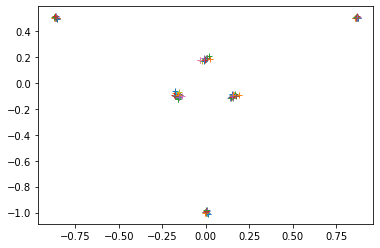

In [16]:
from skimage.transform import estimate_transform, AffineTransform

estimated_transforms = []
for i in range(len(labelled_points)):
    # get the points
    points = labelled_points[i]
    # get the affine transform
    transform = estimate_transform("affine", points, reference_points)
    # add to the list
    estimated_transforms.append(transform)
    # plot the points
    # plt.plot(points[:,0], points[:,1], 'o')
    # plot the transformed points
    plt.plot(transform(points)[:,0], transform(points)[:,1], '+')